# Task 2: Data Analysis

## Important reminder

Remember that this binder allows you to interact with the code. You can change any part of it but you **CANNOT** break anything. If you would like to reset the changes, you just need to re-open the binder link and everything will be go back to it original state. That said, you do not necessarily need to change any code to run this task. If you just run the binder as is you will still get all the results you need. 

Throughout the task and before any coding cell, you see a green <font color='Green'>**"You CAN edit the cell below if you want and then run it!"**</font>, which means that you can edit the code but only if you want.\
If you see a red <font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>, it means you do not need to edit anything. Again, you cannot break anything, so feel free to test and explore.


## Objective

Let us start by restating the problem:

The goal of this data science project is to evaluate how well an online retail store is doing and to predict the revenue growth over the next 3 years. This is a rush job from a client who is considering to buy this business and you only have the daily sales data for the past 4 years to solve this problem.

Based on the project goal and the data we have access to we can frame the problem with the following questions:

1. Is the business growing year-on-year or is the revenue declining?
2. Based on the revenue growth trend (positive or negative) can we use past data to forecast the trend for the next 3 years?

*Our working hypothesis:*

**Hypothesis 1:** The online retail store has a positive year-on-year growth. 

**Hypothesis 2:** The year-on-year growth is stable enough for us to forecast revenue for the next 3 years within a precision of 10% (this is a typical precision for this kind of retail sales forecasting).

We already know from Task 1 that there is positive revenue growth year-on-year. In this task we will work on forecasting future growth.

We have already explored and pre-processed the data and we will start our analysis using the monthly sales dataset generated in Task 1: monthly_sales_data

## Setup the environment

We will start by setting up our analytics environment by calling the required packages for this task. 
Run the following cell to import the packages 

<font color='red'>**You DO NOT need to edit anything in the code below!**</font>

In [42]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import datetime as dt
import numpy as np
import calendar
from scipy.stats import pearsonr

## Reading the input data

Let's read and preview the dataset we generated in Task 1.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

In [43]:
#read dataset
monthly_sales = pd.read_csv('./input_data/monthly_sales_data.csv')

#preview dataset
monthly_sales.head(10)

,Order Date,Sales
0,2018-01-31,14205.7070
1,2018-02-28,4519.8920
2,2018-03-31,55205.7970
3,2018-04-30,27906.8550
4,2018-05-31,23644.3030
5,2018-06-30,34322.9356
6,2018-07-31,33781.5430
7,2018-08-31,27117.5365
8,2018-09-30,81623.5268
9,2018-10-31,31453.3930


As we did in Task 1, before running any analysis we need to convert our date attribute to a datetime format. You just need to run the cell below.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

In [44]:
monthly_sales['Order Date']=pd.to_datetime(monthly_sales['Order Date']) # convert 'Order Date' to datetime format
monthly_sales.sort_values(by=['Order Date'],ignore_index=True,inplace=True) #sort the dataframe by 'Order Date'

## Sales forcasting using a Linear Regression model

We will first model the sales data to determine the year-on-year growth of the business and use the modeling results to forecast the revenue growth over the next 3 years.

Let's visualise again the monthly sales.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

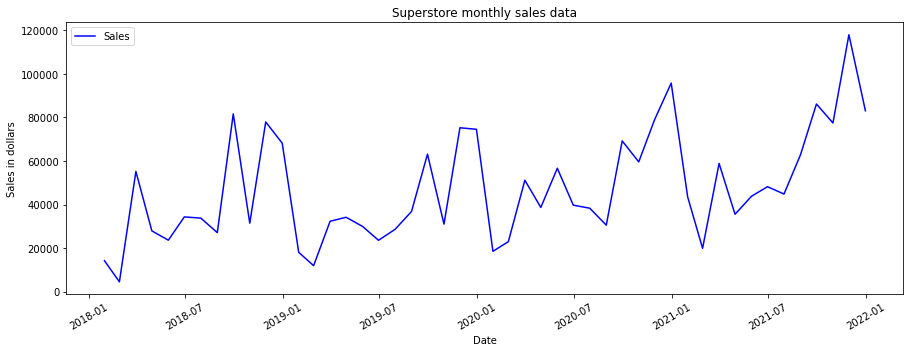

In [45]:
#visualise the aggregated sales
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Sales')
ax.set(xlabel='Date', ylabel='Sales in dollars',
       title='Superstore monthly sales data')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

Ignoring the variability caused by seasonality in the data, we can see that there is a steady year-on-year growth. 
To measure this growth we can fit a linear regression through the data (as explained in <font color='blue'>**Predictive Modelling: Regression**</font>). Given that we want to use the results of the model to forecast future revenue, we will need to validate or confirm that our regression model provides a good fit or match to the real data. This can be done by modelling the regression on only the first 3 years and then use the model to predict the 4th year. Given that we have the real data for the 4th year, we will be able to compare our prediction to the real data and use that to validate our forecasting model. This is a basic predictive Machine Learning (ML) model.

In ML terminology, the process is called training and testing. You split your dataset into a training dataset and a testing dataset. The training dataset (in our case is the 3 first years) is used to build the model, this is also called optimising the model and the testing dataset (in our case is the 4th year of data) is used to test and demonstrate how good is the predictive ML model.

Before fitting a line to the sales data using a regression model we need to convert our dates to ordinal dates. This is basically converting the dates from a day-month-year format to a number. The regression function cannot deal with dates and can only accept numerical variables as input.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

In [46]:
monthly_sales['date_ordinal']=monthly_sales['Order Date'].map(dt.datetime.toordinal)

As explained above, we need to isolate the data of the first 3 years to use as our training dataset and then use this training dataset to build our regression model.

We will then visualise the results of our ML model by plotting the monthly sales in blue, and plot over them the ML model results from training (in green) and the predicted sales data (in red).

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

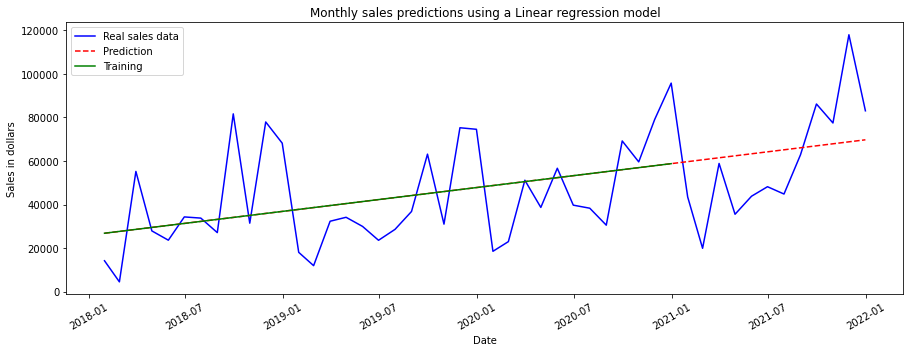

In [47]:
#select the first 3 years ordinal dates as our training X data
training_X=monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)][['date_ordinal']]

#select the first 3 years sales data as our training Y data
training_Y=monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)]['Sales']

#run the regression model on trainin_X and training_Y data (first 3 years of sales data)
regression=LinearRegression().fit(training_X,training_Y)

#predict sales from the regression model
monthly_sales['sales_prediction'] = regression.predict(monthly_sales[['date_ordinal']])

#visualise model results
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(monthly_sales['Order Date'],monthly_sales['Sales'],color='blue',label='Real sales data')
ax.plot(monthly_sales['Order Date'],monthly_sales['sales_prediction'],color='red',label='Prediction',ls='--')
ax.plot(monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)]['Order Date'],
        monthly_sales[monthly_sales['Order Date']<dt.datetime(2021,1,1,0)]['sales_prediction'],
        color='green',label='Training')
ax.set(xlabel='Date', ylabel='Sales in dollars',
       title='Monthly sales predictions using a Linear regression model')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()

As you can see from above, while the model follows nicely the growth trend, we are far from matching the variation we see in the data. This is because our linear regression model is an over simplified representation of our data. 

We can estimate how well we fit the data by calculating the Root Mean Square Error (RMSE) of our regression fit. The RMSE will tell us how far our prediction is from the real data.

In [48]:
#calculate the RMSE using numpy (np) and the metrics packages
RMSE1=np.sqrt(metrics.mean_squared_error(monthly_sales['Sales'], monthly_sales['sales_prediction']))

#calculate how much our estimation deviates from the real values by dividing the RMSE by the average sales value
deviation1=RMSE1/monthly_sales['Sales'].mean()

#print out the deviation in %
print('Our estimation of sales deviates from the real values by ',round(deviation1*100.),'%')

Our estimation of sales deviates from the real values by  46 %


As you see above, we are off by 46%! That is very high and makes our prediction of monthly sales not very accurate.

It is possible to fit the seasonality in the dataset by using a more complex Linear Regression model which would use more than a single coefficient. This type of model is called a multi-variate Linear Regression model. Remember though, we are not trying to predict monthly sales. What we are trying to predict is yearly sales which are less sensitive to seasonality. Let's test our prediction model against yearly prediction.

First, we need to aggregate our data to yearly level including the 'sales_prediction' data. You should be already familiar with the aggregation concept from Task 1.

Next, we will plot the datapoints with real sales data in blue and regression model prediction in red.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

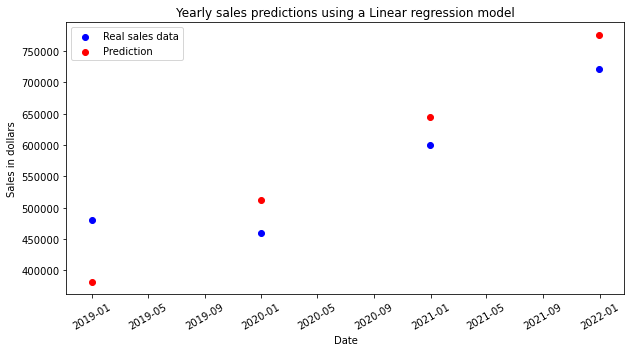

In [49]:
# aggregate the sales data yearly including the prediction data
yearly_sales = monthly_sales.groupby(pd.Grouper(key='Order Date', freq='Y'))\
       .sum()\
       .sort_values(['Order Date','Sales'],ascending=[True,False])\
       .reset_index()

# visualise yearly sales data, real and predictions
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(yearly_sales['Order Date'],yearly_sales['Sales'],color='blue',label='Real sales data')
ax.scatter(yearly_sales['Order Date'],yearly_sales['sales_prediction'],color='red',label='Prediction')
ax.set(xlabel='Date', ylabel='Sales in dollars',
       title='Yearly sales predictions using a Linear regression model')
plt.xticks(rotation=30)
plt.legend(loc="upper left")
plt.show()


As you can see from the visual above, while still not perfect, our predicted values are closer to the real sales values at yearly level.

Let's check again the deviation between real sales and predicted sales.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

In [50]:
#calculate the RMSE using numpy (np) and the metrics packages
RMSE2=np.sqrt(metrics.mean_squared_error(yearly_sales['Sales'], yearly_sales['sales_prediction']))

#calculate how much our estimation deviates from the real values by dividing the RMSE by the average sales value
deviation2=RMSE2/yearly_sales['Sales'].mean()

#print out the deviation in %
print('Our estimation of sales deviates from the real values by ',round(deviation2*100.),'%')

Our estimation of sales deviates from the real values by  12 %


A deviation of 12% from the real values, while still not ideal, is very good for such a simplified approach. For reference, in retail forecasting, we usually aim for a deviation of less than 10%.

Let us use this model to forecast the yearly sales for 2022, 2023 and 2024. Because our model is built on a monthly dataset, we need to predict monthly for each year and then aggregate to obtain the yearly sales predictions. 
Our dataset doesn't contain the months up to the year 2024 so we will need to build a new dataframe with monthly dates from 2021 (our testing year) all the way to the end of 2024. After creating this new date dataframe we will predict the sales using our regression model results and then aggregate the values yearly.

Remember, you do not have to worry much about the coding part as most of these commands can easily be found online. The important part is to follow the process.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

In [51]:
#create a data table with future months starting from the testing year 2021 to the end of 2024
future_months = pd.DataFrame({'Date': pd.date_range(dt.datetime(2021,1,1,0),dt.datetime(2024,12,31,0), freq='M')})

#our regression model needs ordinal data
future_months['date_ordinal']=future_months['Date'].map(dt.datetime.toordinal)

#predict sales for future months
future_months['sales_prediction'] = regression.predict(future_months[['date_ordinal']])

#aggregate monthly results to yearly
future_years = future_months.groupby(pd.Grouper(key='Date', freq='Y'))\
       .sum()\
       .sort_values(['Date','sales_prediction'],ascending=[True,False])\
       .reset_index()

#preview the result
future_years

,Date,date_ordinal,sales_prediction
0,2021-12-31,8855843,7.761260e+05
1,2022-12-31,8860223,9.074833e+05
2,2023-12-31,8864603,1.038841e+06
3,2024-12-31,8868994,1.170528e+06


Having the total sales forecast number is good but it is better to provide the forecast in terms of percentage change compared to the previous year. We can calculate that by using a **pandas** function called 'pct_change()'. After calculating the percentage change in revenue we can now drop the data for year 2021 and only keep the future years we wanted to forecast for. To visualise the results we can use a bar chart.

<font color='red'>**"You DO NOT need to edit anything in the code below! Just run the cell."**</font>

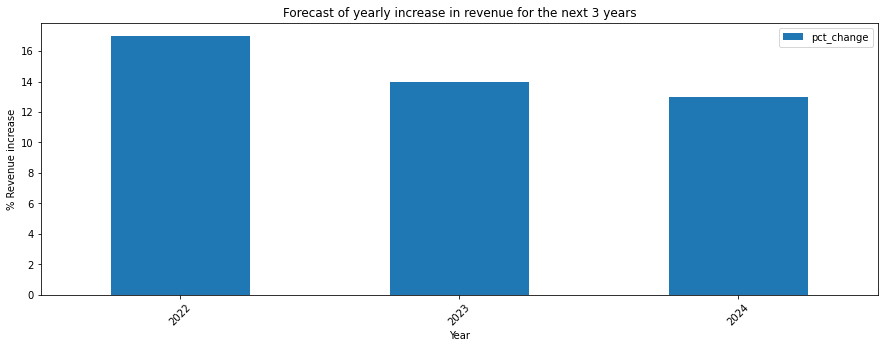

In [52]:
#calculate percentage change year-on-year
future_years['pct_change']=round(future_years['sales_prediction'].pct_change()*100)

#drop the first row which correspond to the testing year 2021
future_years_forecast = future_years.drop(labels=0, axis=0)

#create a year column to have a cleaner x axis label
future_years_forecast['Year'] = future_years_forecast['Date'].dt.year

#visualise the data using a bar chart
ax=future_years_forecast.plot.bar(x='Year', y='pct_change', rot=45,figsize=(15,5),\
                                  title=("Forecast of yearly increase in revenue for the next 3 years"))\
                                  .set_ylabel("% Revenue increase")

We have estimated the revenue increase for the next 3 years. Our standard deviation (this is how far our prediction can be from the true value) is within 12%. In reality, this standard deviation is not fixed. This error will increase for each year further in the future. It is possible to use a statistical model to project this standard deviation for each year in the future but we will not do that in this exercise. 

Concerning our hypothesis, we did verify that the business is growing year-on-year but based on the % change the growth is slowing down (meaning every year the revenue grows less). There could be many causes to this decrease in sales: global financial trends such as inflation, poor management, poor marketing strategy or increase in competition. You would need more data to investigate the cause and a more in depth analysis.

For our second hypothesis, while we did forecast revenue growth for the next 3 years, we did not achieve a standard deviation within 10%. Improving the model quality using a more complex model that can account for seasonality and more data is always good as preferably you should have more training data compared to what you are forecasting. In our case, we are really at the limit using 3 years of data to forecast 3 years in the future.